In [52]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#load the MNIST dataset (handwritten digits 0-9)
(x_train, y_train), (_, _) = keras.datasets.mnist.load_data()

#Normalize the pixel values (0-255) to range (0-1)
x_train = x_train / 255.0

#Flatten the images (from 28x28 to 784 input features)
x_train = x_train.reshape(-1, 28*28)

In [54]:
model = keras.Sequential([
    keras.layers.Dense(120, activation='sigmoid', input_shape=(784,)),
    keras.layers.Dense(64, activation='sigmoid'), #Hidden Layer
    keras.layers.Dense(10, activation='sigmoid') # Output Layer (10 classes)
])

# Coompile the modal
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, 
          epochs=10, 
          batch_size=len(x_train),
          verbose=1)

predictions = model.predict(x_train)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0993 - loss: 2.7930
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.0993 - loss: 2.6949
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.0993 - loss: 2.6127
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.0993 - loss: 2.5453
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.0993 - loss: 2.4903
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.0993 - loss: 2.4452
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.1007 - loss: 2.4076
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.1213 - loss: 2.3756
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.1826 - loss: 2.3476
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.2737 - loss: 2.3227
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


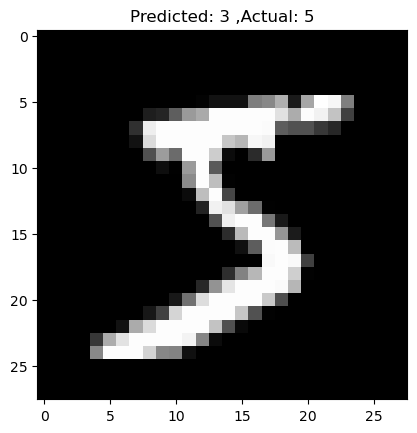

In [56]:
index = 0
plt.imshow(x_train[index].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {np.argmax(predictions[index])} ,Actual: {y_train[index]}')
plt.show()

In [58]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32,
                    validation_data=(X_test, y_test))

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest loss: {loss:.4f}")
print(f"\nTest accuracy: {accuracy:.4f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7937 - loss: 0.9000 - val_accuracy: 0.9306 - val_loss: 0.2374
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9403 - loss: 0.2081 - val_accuracy: 0.9507 - val_loss: 0.1700
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9586 - loss: 0.1422 - val_accuracy: 0.9608 - val_loss: 0.1289
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9685 - loss: 0.1076 - val_accuracy: 0.9663 - val_loss: 0.1137
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9763 - loss: 0.0843 - val_accuracy: 0.9691 - val_loss: 0.0999
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9802 - loss: 0.0689 - val_accuracy: 0.9719 - val_loss: 0.0917
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9853 - loss: 0.0539 - val_accuracy: 0.9705 - val_loss: 0.0935
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9886 - loss: 0.0414 - 

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Test loss: 0.0814
Test accuracy: 0.9753

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1175
           1       0.98      0.99      0.99      1322
           2       0.97      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.98      0.98      0.98      1176
           5       0.97      0.96      0.97      1104
           6       0.98      0.98      0.98      1177
           7       0.99      0.97      0.98      1299
           8       0.98      0.96      0.97      1160
           9       0.96      0.98      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



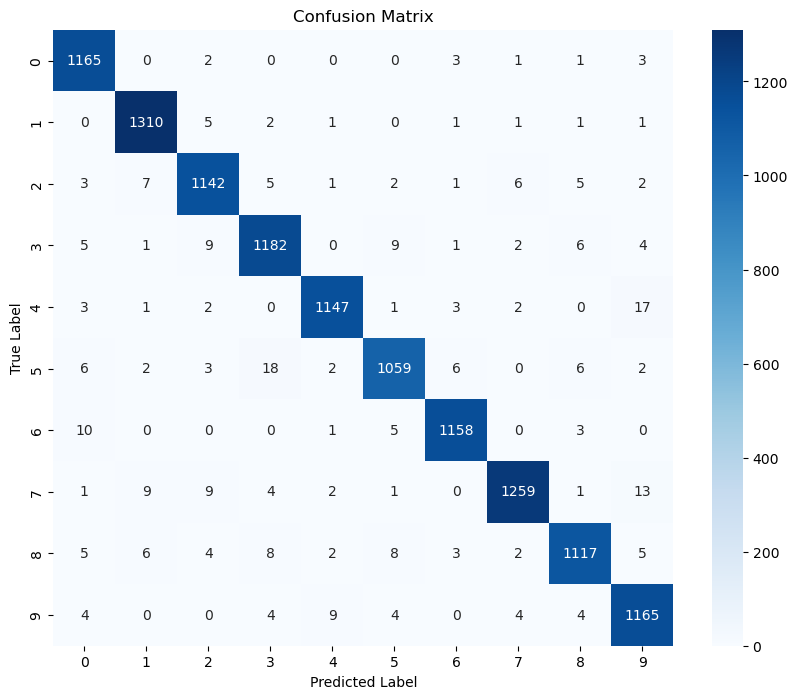

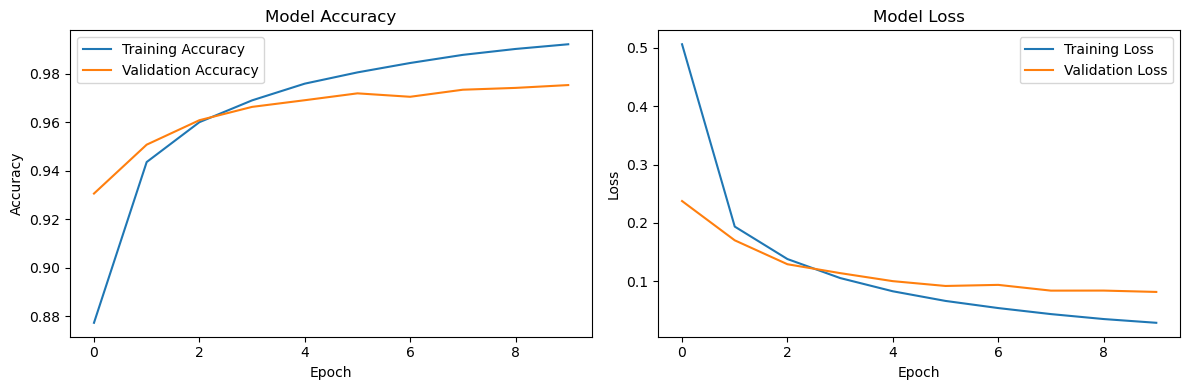

In [63]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# 1. Calculate and display basic metrics
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# 2. Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# 3. Create and plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 4. Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

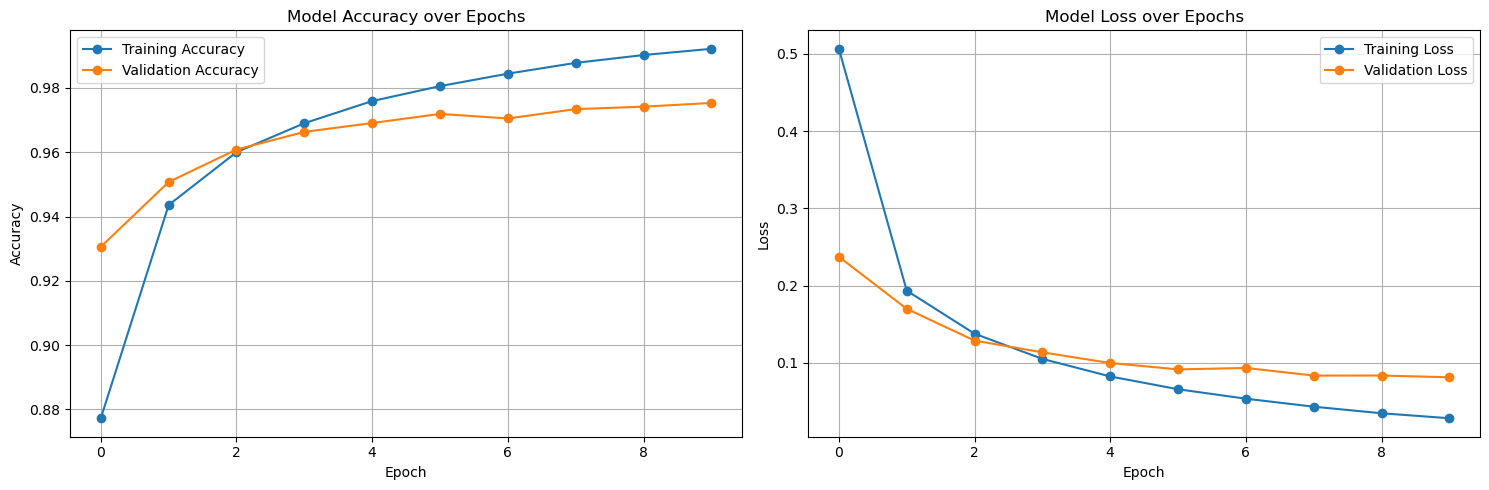


Final Training Metrics:
Training Accuracy: 0.9922
Validation Accuracy: 0.9753
Training Loss: 0.0285
Validation Loss: 0.0814

Improvement Analysis:
Accuracy improvement: 0.1149
Loss improvement: 0.4779


In [66]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Create function to plot training history
def plot_training_history(history):
    # Convert history to dataframe for easier manipulation
    hist_df = pd.DataFrame(history.history)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot Accuracy
    ax1.plot(hist_df['accuracy'], label='Training Accuracy', marker='o')
    ax1.plot(hist_df['val_accuracy'], label='Validation Accuracy', marker='o')
    ax1.set_title('Model Accuracy over Epochs')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # Plot Loss
    ax2.plot(hist_df['loss'], label='Training Loss', marker='o')
    ax2.plot(hist_df['val_loss'], label='Validation Loss', marker='o')
    ax2.set_title('Model Loss over Epochs')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print final values
    print("\nFinal Training Metrics:")
    print(f"Training Accuracy: {hist_df['accuracy'].iloc[-1]:.4f}")
    print(f"Validation Accuracy: {hist_df['val_accuracy'].iloc[-1]:.4f}")
    print(f"Training Loss: {hist_df['loss'].iloc[-1]:.4f}")
    print(f"Validation Loss: {hist_df['val_loss'].iloc[-1]:.4f}")
    
    # Calculate and print improvement
    print("\nImprovement Analysis:")
    print(f"Accuracy improvement: {(hist_df['accuracy'].iloc[-1] - hist_df['accuracy'].iloc[0]):.4f}")
    print(f"Loss improvement: {(hist_df['loss'].iloc[0] - hist_df['loss'].iloc[-1]):.4f}")

# Call the function with your training history
plot_training_history(history)